In [1]:
from wordcloud import WordCloud

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
rawDf=pd.read_csv("sample.csv")

In [4]:
sequance=''.join(rawDf["sequance"])
control=''.join(rawDf["control"])

In [5]:
print(len(sequance),len(control))

17371538 17371538


In [2]:
#dnaHomoSapiens="GACCTATATTGCCGCTGATGAAGCGACAAAACAGGCGATGGTGGAAGTGGTCTATGGCCGCTCCCTCTATGCCGGGGCGGCTCACGGGCCGTCGCCTACCGGTAATCCCAGGGCATTGATCATTGGCAGCCNNNNNNNNNNNNGNTGGACAGGGTTACGGGCGATATCCAGCACGGCGTCGGTAAAGGCGTTGCAGGCGGTGGAGCATCGTGGCGTCGATAGCAACTGGCTGGCCGTTCTTGTCAGCGTGGTCGCGCTGACTATCCTGGGCATTACTCTGCTGGTTTCTTTATTTGCGTCATTAACGGCTTTAAAGCCATCCAGATCCATAAACAGTAGCGCGAAAGACGTGCCTTCCCGATTCGCTTTGCTGATGGCCTGTTCCAGACGATCCT"
#control="AAGGGAGGIIIIIIIIIIIGGIIIIIIIIIGIIIIIIGIIIIIIIIIIIGIGIGIIIIIIIIIIIIIIIIIIIIGIIIIIGIIIIIIGGGIGIIGIIIIIIAGAGGIIIIIIIIGIIIGIGIIIIIIIIII############<#<<GGIGIGIIIIIIIIIIGIIIIIIIGIGGGIIIIIIIIGIIIIIIIIIIIIGIIGIGGIIGGIGGIIGGGGGGGGAGGGGGGGGGGGGGGIIIGGGIIGGIGGAGIGGGI<GGGIGGGGGIGIGGAGGGIAGIGGIGGGIIIGGGGGGI<GAGAGGGIIIIIIIIIGGG.GGGGIGGIGGGGIIIGGIIGGGGIIGGIIGGIIGGGGGGIIGGIIIGGIGIIIIIGAGGGGGGGGGGGGGGIIIGGGGG"

Örüntülerin DNA sequance ından çıkarılması

In [ ]:
Örüntülerden en uzununun karakter sayısı

In [78]:
maxLenght=10

In [79]:
dd=[]
for i,c in enumerate(control):    
    if i == 0:
        continue
    item=ord(control[i])
    itemBefore=ord(control[i-1])
    if item <= itemBefore:
        continue
    for j in range(maxLenght):
        if i-j>0:
            s=sequance[i-j:i]
            if len(s)>1 :
                dd.append({"str":s,"val":control[i-1]+control[i],
                           "valInt":item-itemBefore})

In [80]:
df=pd.DataFrame(dd)
df["strlen"]=df["str"].str.len()
df["count"]=df.groupby(["str"])["str"].transform("count")
df.head()

,str,val,valInt,strlen,count
0,CT,FG,1,2,341682
1,GCT,FG,1,3,82377
2,GGCT,FG,1,4,24871
3,TGGCT,FG,1,5,7361
4,GTGGCT,FG,1,6,1746


In [96]:
sc=df[df["count"]>22000]
sc=sc[sc["strlen"]>2]
sc.head()

,str,val,valInt,strlen,count
1,GCT,FG,1,3,82377
2,GGCT,FG,1,4,24871
9,TAT,EF,1,3,41389
17,TGC,=B,5,3,72635
25,GCA,BC,1,3,85284


In [83]:
sc.to_csv("pattern_10.csv")

[Text(0, 0, 'GCT'),
 Text(0, 0, 'GGCT'),
 Text(0, 0, 'TAT'),
 Text(0, 0, 'TGC'),
 Text(0, 0, 'GCA'),
 Text(0, 0, 'TGCA'),
 Text(0, 0, 'CAA'),
 Text(0, 0, 'AAG'),
 Text(0, 0, 'AAAG'),
 Text(0, 0, 'AGA'),
 Text(0, 0, 'CAGA'),
 Text(0, 0, 'AGC'),
 Text(0, 0, 'CCG'),
 Text(0, 0, 'GGT'),
 Text(0, 0, 'TGA'),
 Text(0, 0, 'GTGA'),
 Text(0, 0, 'GAA'),
 Text(0, 0, 'TGAA'),
 Text(0, 0, 'ACA'),
 Text(0, 0, 'GAG'),
 Text(0, 0, 'AGCA'),
 Text(0, 0, 'AGT'),
 Text(0, 0, 'CAGT'),
 Text(0, 0, 'GTG'),
 Text(0, 0, 'TGG'),
 Text(0, 0, 'GGCA'),
 Text(0, 0, 'CAT'),
 Text(0, 0, 'GTC'),
 Text(0, 0, 'TCC'),
 Text(0, 0, 'TAA'),
 Text(0, 0, 'GGA'),
 Text(0, 0, 'CAC'),
 Text(0, 0, 'CTGC'),
 Text(0, 0, 'TGCT'),
 Text(0, 0, 'TCT'),
 Text(0, 0, 'CTCT'),
 Text(0, 0, 'TGT'),
 Text(0, 0, 'CTGT'),
 Text(0, 0, 'TTC'),
 Text(0, 0, 'TTTC'),
 Text(0, 0, 'CCC'),
 Text(0, 0, 'CTT'),
 Text(0, 0, 'CTC'),
 Text(0, 0, 'CCA'),
 Text(0, 0, 'CCCA'),
 Text(0, 0, 'CGT'),
 Text(0, 0, 'GTGT'),
 Text(0, 0, 'CCT'),
 Text(0, 0, 'TCCT'),
 Te

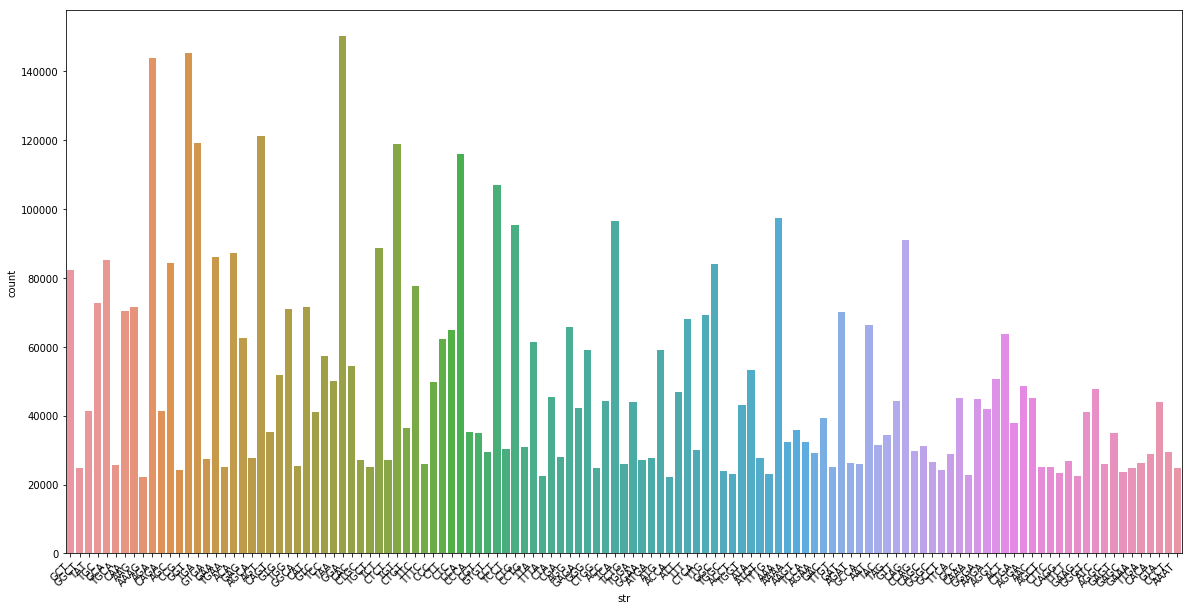

In [99]:
plt.figure(figsize=(20,10))
chart = sns.countplot(sc["str"])
chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=45, horizontalalignment='right')

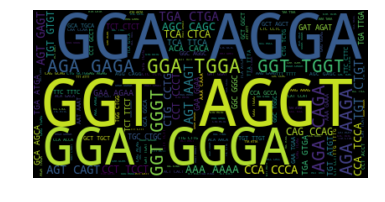

In [85]:
text = " ".join(review for review in sc["str"])
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [86]:
sc=sc.sort_values(by='valInt', ascending=False)
sc.head()

,str,val,valInt,strlen,count
31426483,GAAGT,#I,38,5,10440
21389492,GAGTGG,#I,38,6,929
31395643,TGCCG,#I,38,5,1454
31395841,AGT,#I,38,3,121194
31395842,GAGT,#I,38,4,35053


In [19]:
import numpy as np

No handles with labels found to put in legend.


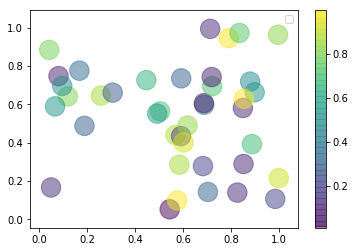

In [28]:
N = 40
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
plt.scatter(sc.str,y,s=sc.valInt*10, alpha=0.5,c=colors,cmap='viridis')
plt.legend(numpoints=1)
plt.colorbar();

In [31]:
sc.describe()

,valInt,strlen,count
count,4.251322e+06,4251322.0,4.251322e+06
mean,4.052984e+00,3.0,8.121990e+04
std,4.975489e+00,0.0,3.301949e+04
min,1.000000e+00,3.0,1.586700e+04
25%,1.000000e+00,3.0,5.907100e+04
50%,2.000000e+00,3.0,7.263500e+04
75%,5.000000e+00,3.0,9.726100e+04
max,3.800000e+01,3.0,1.502440e+05


In [87]:
dsc=sc.groupby("str").agg({'valInt': ['min','max','mean','sum',"count"]})

In [88]:
dsc.to_csv("group_10_minmax.csv")

In [89]:
dsc=pd.read_csv("group_10_minmax.csv")
dsc.head(10)

,str,min,max,mean,sum,count
0,AAA,1,38,3.617195,351812,97261
1,AAAA,1,37,3.743951,121158,32361
2,AAAAA,1,37,4.003919,46998,11738
3,AAAAAA,1,37,4.330107,21027,4856
4,AAAAAAA,1,37,4.553719,12673,2783
5,AAAAAAAA,1,37,4.737939,8642,1824
6,AAAAAAAAA,1,37,4.863331,6512,1339
7,AAAAAAAG,1,37,6.836852,3562,521
8,AAAAAAAT,1,37,5.445312,3485,640
9,AAAAAAC,1,36,5.627713,3371,599


In [61]:
dsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
str     64 non-null object
min     64 non-null int64
max     64 non-null int64
mean    64 non-null float64
sum     64 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.6+ KB


In [ ]:
plt.figure(figsize=(20,4))
plt.xticks(rotation=45)
plt.bar(dsc["str"], dsc["max"])
plt.bar(dsc["str"], dsc["mean"])
plt.bar(dsc["str"], dsc["min"])
plt.legend(["max","mean","min"])